In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from numpy import linalg as LA
import math
from tqdm import tqdm
import csv
import pandas as pd


In [4]:
data = []
catagories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']   
fold1 = []
fold2 = []
fold3 = []
fold4 = []
fold5 = []


# Readind all 50,000 images from CIFAR10 data set's train folder and trainLabels.csv file.


In [5]:
'''creates a list of all the images with their corresponding class'''

_DATA_SET='CIFAR10'
path=os.path.join(_DATA_SET,'train')
f=pd.read_csv('CIFAR10/trainLabels.csv')

for img in tqdm(os.listdir(path)): 
    img_split=img.split('.')
    img_label=img_split[0]
    img_label_index=int(img_label)-1
    img_arr=cv2.imread(os.path.join(path,img))
    class_name=catagories.index(f['label'][img_label_index])
    data.append([img_arr,class_name])
    
'''output: a list of lists.
   structure of list: [[image_array, class_num], [image_array, class_num]]
   class_num -> to which catagory the image belongs to
'''
    
    

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:32<00:00, 1538.98it/s]


In [6]:
print(data[3][1])

5


In [7]:
'''compares two image and returns the score'''

def compare_two_image(img1, img2, opr):
    if opr == 'euclidean':
        score = LA.norm(img1 - img2)
    elif opr == 'manhattan':
        score = np.sum(np.abs(img1 - img2))
    return score

# cross validation

In [8]:
'''At first all 50,000 images are suffled then are devided into five lists each containing 10,000 lists for each images.'''

temp = data[:]  
random.shuffle(temp)
fold1 = temp[0:10000]
fold2 = temp[10000:20000]
fold3 = temp[20000:30000]
fold4 = temp[30000:40000]
fold5 = temp[40000:50000]

In [9]:
set1_fold = fold1 + fold2 + fold3 + fold4
set1_validationfold = fold5

set2_fold = fold1 + fold2 + fold3 + fold5
set2_validationfold = fold4

set3_fold = fold1 + fold2 + fold4 + fold5
set3_validationfold = fold3

set4_fold = fold1 + fold3 + fold4 + fold5
set4_validationfold = fold2

set5_fold = fold2 + fold3 + fold4 + fold5
set5_validationfold = fold1

In [10]:
# Training Set

training_set_list = [set1_fold, set2_fold, set3_fold, set4_fold, set5_fold]

# Validation set

validation_set_list = [set1_validationfold, set2_validationfold, set3_validationfold, set4_validationfold, set5_validationfold]

In [11]:
'''take one image from the validation_fold and find 20 most similar images from the other folds'''

def k_fold_score(img, train_fold, k, opr):
    
    scorelist = []
    for i in range(len(train_fold)):
        score = compare_two_image(img, train_fold[i][0], opr)  # calls the compare_two_image function to find the distance.
        if score != 0:
            scorelist.append([score, train_fold[i][0], train_fold[i][1]])
    scorelist.sort(key = lambda x: x[0])
    return scorelist[:k]

'''output: a list of lists that contains similar images of the image passed in the  input parameter.
   returns in ascending order structure of list: [[score, image_array, class_num], [score, image_array, class_num]]
'''

# Here we store the 20 images of the closest distance to every images of validaion folders for all five sets so that we can use these values later for the value of k=1 to k=20

In [12]:
sorted_20=[]
per_validation_image=[]
per_fold=[]
for set_iter in tqdm(range(0,5)):
    for image_iter in range(len(fold5)):
        sorted_20 = k_fold_score(validation_set_list[set_iter][image_iter][0], training_set_list[set_iter], 20, 'manhattan')
        per_validation_image.append(sorted_20)
        sorted_20=[]
        
    per_fold.append(per_validation_image)
    per_validation_image=[]
    
    '''In per_fold list there are five lists, each list  contains 10,000 lists and there each list contains 20 lists
      and there each list contains three valuses''' 
    

100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [9:51:34<00:00, 7098.82s/it]


In [13]:
''' In next four sells we can see the structure of the list where the  closest  20 values for every image in 
validation_set_list is stored'''  

print(len(per_fold))

5


In [14]:
print(len(per_fold[2]))

10000


In [15]:
print(len(per_fold[1][0]))

20


In [16]:
print(len(per_fold[1][0][3]))

3


In [17]:
def duplicates(lst, item):
      return [i for i, x in enumerate(lst) if x == item]

In [20]:
#Part-1 ------------------------------------------------------------------

In [22]:


# graph_plot_list = []
# for k in tqdm(range(1, 21)):     
#     for set_iter in range(0, 5):
       
#         correct = 0 
#         wrong = 0
#         for image_iter in range(len(fold5)):
            
#             b = per_fold[set_iter][image_iter]
#             a = b[0:k]
#             c =  [0]*10
#             d =  [0]*10
#             for i in range(len(a)):
#                 if a[i][2] == 0:
#                     c[0] = c[0] + 1
#                     d[0] = d[0] + a[i][0]
                    
#                 elif a[i][2] == 1:
#                     c[1] = c[1] + 1
#                     d[1] = d[1] + a[i][0]
                    
#                 elif a[i][2] == 2:
#                     c[2] = c[2] + 1
#                     d[2] = d[2] + a[i][0]
                    
#                 elif a[i][2] == 3:
#                     c[3] = c[3] + 1
#                     d[3] = d[3] + a[i][0]
                    
#                 elif a[i][2] == 4:
#                     c[4] = c[4] + 1
#                     d[4] = d[4] + a[i][0]
                    
#                 elif a[i][2] == 5:
#                     c[5] = c[5] + 1
#                     d[5] = d[5] + a[i][0]
                    
#                 elif a[i][2] == 6:
#                     c[6] = c[6] + 1
#                     d[6] = d[6] + a[i][0]
                    
#                 elif a[i][2] == 7:
#                     c[7] = c[7] + 1
#                     d[7] = d[7] + a[i][0]
                    
#                 elif a[i][2] == 8:
#                     c[8] = c[8] + 1
#                     d[8] = d[8] + a[i][0]
                    
#                 elif a[i][2] == 9:
#                     c[9] = c[9] + 1
#                     d[9] = d[9] + a[i][0]
                
            
#             p = duplicates(c, max(c))
            
            
            
#             if (len(p)>1):
                
#                 q= [ d[i] for i in p ]
                
#                 if d.index(min(q)) == validation_set_list[set_iter][image_iter][1]:
#                     correct += 1
                
                    
            
            
#             else:
#                 if c.index(max(c)) == validation_set_list[set_iter][image_iter][1]:
#                     correct += 1
            
           
            
           
 #         accuracy = (correct/10000) *100
#         graph_plot_list.append([k, accuracy, set_iter])
        
        
        
  

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


In [21]:
#part-2 --------------------------------------------------------------------------------

In [27]:
graph_plot_list = []
for k in tqdm(range(1, 21)):     
    for set_iter in range(0, 5):
       
        correct = 0 
        wrong = 0
        for image_iter in range(len(fold5)):
            
            b = per_fold[set_iter][image_iter] # Here we get the 20 closest images for every image in validation_set_list
            a = b[0:k]  # Of the 20 values we get the values accordind to the value of k.
            c =  [0]*10       
            d =  [0]*10
            for i in range(len(a)):
                if a[i][2] == 0:
                    c[0] = c[0] + 1
                    d[0] = d[0] + a[i][0]
                    
                elif a[i][2] == 1:
                    c[1] = c[1] + 1
                    d[1] = d[1] + a[i][0]
                    
                elif a[i][2] == 2:
                    c[2] = c[2] + 1
                    d[2] = d[2] + a[i][0]
                    
                elif a[i][2] == 3:
                    c[3] = c[3] + 1
                    d[3] = d[3] + a[i][0]
                    
                elif a[i][2] == 4:
                    c[4] = c[4] + 1
                    d[4] = d[4] + a[i][0]
                    
                elif a[i][2] == 5:
                    c[5] = c[5] + 1
                    d[5] = d[5] + a[i][0]
                    
                elif a[i][2] == 6:
                    c[6] = c[6] + 1
                    d[6] = d[6] + a[i][0]
                    
                elif a[i][2] == 7:
                    c[7] = c[7] + 1
                    d[7] = d[7] + a[i][0]
                    
                elif a[i][2] == 8:
                    c[8] = c[8] + 1
                    d[8] = d[8] + a[i][0]
                    
                elif a[i][2] == 9:
                    c[9] = c[9] + 1
                    d[9] = d[9] + a[i][0]
                
            
            
            
            if c.index(max(c)) == validation_set_list[set_iter][image_iter][1]:
                correct += 1
            
            
            
            
           
            
           
        accuracy = (correct/10000)*100
        graph_plot_list.append([k, accuracy, set_iter])
        

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.14s/it]


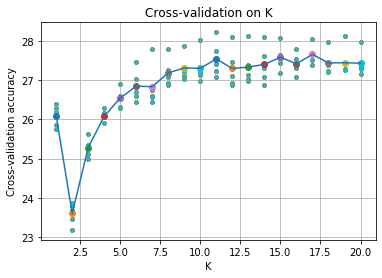

In [28]:
x = []
y = []
z = []

t=[ i for i in range(1,21)]
for i in range(len(graph_plot_list)):
    x.append(graph_plot_list[i][0])
    y.append(graph_plot_list[i][1])
for i in range(len(x)):
    plt.plot(x,y, '.')
    
q=0
p=[]

'''Here we calculate the mean for every values  of k'''

for i in range(1,len(graph_plot_list)+1):
    q+=graph_plot_list[i-1][1]
    if i%5==0:
        p.append(q/5)
        q=0

for i in range(1,21):
    plt.plot( i,p[i-1],'o');
ax=plt.axes()
ax.plot(t,(p))
    
plt.grid()
plt.xlabel('K')
plt.ylabel('Cross-validation accuracy')
plt.title('Cross-validation on K')
  
plt.show()
    